# Generic Graph Plotting Class Template

> @author: Zhihao Li

> @date: 2024-11-16

> @homepage: https://zhihaoli.top/

In [1]:
import os
import numpy as np
import pandas as pd

from sklearn.preprocessing import Normalizer

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

import warnings
warnings.filterwarnings('ignore')

In [2]:
class DataProcessor:

    # Initialize the configuration of Data Preprocessing
    def __init__(self):
        self.data = None

    def LoadData(self, data_path, sheet_name=0, sep=',', header=0, index_col=None):
        """LoadData Function
            Input: 
                data_path: the path of data file
                sheet_name: the table of Excel file
                sep: the separate sign of csv file
                header: the row of column names
                index_col: the index column of data file
            Output:
                self.data: the data read from given data file
            Function:
                From given source to reach the needed data.
        """
        if data_path.split('.')[-1] in ('xlsx', 'xls'):
            self.data = pd.read_excel(data_path, sheet_name=sheet_name, header=header, index_col=index_col)
        elif data_path.split('.')[-1] == 'csv':
            self.data = pd.read_csv(data_path, sep=sep, header=header, index_col=index_col)
        else:
            raise Exception('Unknown data file type!')
        self.PrintData()
    
    def DataProcessing(self, date_name=None, fill_name=None, fill_method="Nearest", standard_name=None, standard_method="Zscore"):
        """DataProcessing Function
            Input: 
                date_name: the column need to be converted to date style
                fill_name: the columns need to fill the missing values
                fill_method: the methods used to fill the missing values, alternatives like "Nearest"(default), "Linear", "Polynomial",
                             "Spline", "Mean", "Ffill", "Bfill", other specific value. 
                standard_name: the columns need to standardized
                standard_method: the methods used to standardize the columns, alternatives like "Zscore"(default), "Minmax".
            Output:
                self.data: the data has been transformed
            Function:
                Process the data got from dat file by filling the missing values and standardize some columns.
        """
        if date_name is not None:
            # Assuming the date_name column has be converted to the format like "2024-1-31"
            self.data[date_name] = pd.to_datetime(self.data[date_name])

        if fill_name is not None:
            if fill_method == "Nearest":
                self.data[fill_name] = self.data[fill_name].interpolate(method="nearest")
            elif fill_method == "Linear":
                self.data[fill_name] = self.data[fill_name].interpolate(method="linear")
            elif fill_method == "Polynomial":
                self.data[fill_name] = self.data[fill_name].interpolate(method="polynomial", order=2)
            elif fill_method == "Spline":
                self.data[fill_name] = self.data[fill_name].interpolate(method="spline", order=2)
            elif fill_method == "Mean":
                self.data[fill_name] = self.data[fill_name].fillna(self.data[fill_name].mean())
            elif fill_method == "Ffill":
                self.data[fill_name] = self.data[fill_name].fillna(method="ffill")
            elif fill_method == "Bfill":
                self.data[fill_name] = self.data[fill_name].fillna(method="bfill")
            else:
                self.data[fill_name] = self.data[fill_name].fillna(int(fill_method))
        
        if standard_name is not None:
            stdata = self.data[standard_name]
            if standard_method == "Zscore":
                self.data[standard_name] = (stdata - stdata.mean()) / stdata.std()
            elif standard_method == "Minmax":
                self.data[standard_name] = (stdata - stdata.min()) / (stdata.max() - stdata.min())
                
        self.PrintData()
        

    def PrintData(self):
        """A function to print out the loaded dataframe.
           Output the length of data, the first 5 elements and last 5 elements of data.
        """
        print(">>> Data Length: %d" % (len(self.data)))
        print(f">>> Data Head:\n{self.data.head()}")
        print(f">>> Data Tail:\n{self.data.tail()}")

In [3]:
class GraphPlotTool(DataProcessor):

    # Initialize the configuration of GraphPlot Tool
    def __init__(self, fname1="times.ttf", fname2="ARLRDBD.TTF"):
        super().__init__()
        # Set up Seaborn style
        sns.set(style="whitegrid")
        
        # Fonts style
        self.title_fontsize = 12
        self.label_fontsize = 10
        self.fname1 = "../fonts/" + fname1
        self.fname2 = "../fonts/" + fname2
        self.digit_fontprop = FontProperties(fname=self.fname1)
        self.title_fontprop = FontProperties(fname=self.fname2)
        self.legend_fontprop = FontProperties(fname=self.fname2)
        
        # Set colors
        self.colors_name = ['yellow', 'blue', 'green', 'magenta', 'red', 'cyan', 'purple', 'orange', 'gray', 'pink']
        self.colors_rgb = ['#f94144', '#f3722c', '#f8961e', '#f9844a', '#f9c74f', '#90be6d', '#43aa8b', '#4d908e', '#577590', '#277da1']
        self.figsize = (12, 4)
        self.dpi = 500
        
    def HistKdePlot(self, image_name, data_name, data_clean, data_noisy, output_dir):
        """
        Plot a Histgram compared to a Kde according by row.
        params:
            image_name: the name of image file.
            data_names: a string list has the shape of (rows, cols).
            data_clean: a sub-dataset in a sub-graph.
            data_noisy: another sub-dataset in a sub-graph.
            output_dir: the directory to save the images.
        """
        fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=self.dpi)

        # histplot for sub-figure1
        sns.histplot(data_clean, color="blue", label="Clean", kde=False, stat="probability", bins=20, alpha=0.6, ax=axes[0])
        sns.histplot(data_noisy, color="red", label="Noisy", kde=False, stat="probability", bins=20, alpha=0.6, ax=axes[0])
        axes[0].set_title(f'{data_name} Density (Histogram)', fontproperties=self.title_fontprop, fontsize=self.title_fontsize+2)
        axes[0].set_xlabel(r'$L_{Divide}$', fontproperties=self.title_fontprop, fontsize=self.label_fontsize+2)
        axes[0].set_ylabel('Probability Density', fontproperties=self.title_fontprop, fontsize=self.label_fontsize+2)
        axes[0].legend(prop=self.legend_fontprop)

        # kdeplot for sub-figure2
        sns.kdeplot(data_clean, color="blue", label="Clean", fill=True, ax=axes[1], alpha=0.3)
        sns.kdeplot(data_noisy, color="red", label="Noisy", fill=True, ax=axes[1], alpha=0.3)
        axes[1].set_title(f'{data_name} Density (KDE)', fontproperties=self.title_fontprop, fontsize=self.title_fontsize+2)
        axes[1].set_xlabel(r'$L_{Divide}$', fontproperties=self.title_fontprop, fontsize=self.label_fontsize+2)
        axes[1].set_ylabel('Probability Density', fontproperties=self.title_fontprop, fontsize=self.label_fontsize+2)
        axes[1].legend(prop=self.legend_fontprop)

        plt.tight_layout()

        folder_path = os.path.join(output_dir)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)

        plt.savefig(os.path.join(folder_path, f"{image_name}.png"), format="png")
        plt.show()
        
    def HistComparePlot(self, image_name, data_names, data_clean, data_noisy, output_dir):
        """
        Plot multiple Histgrams to compare by row.
        params:
            image_name: the name of image file.
            data_names: a string list has the shape of (rows, cols).
            data_clean: a sub-dataset in a sub-graph.
            data_noisy: another sub-dataset in a sub-graph.
            output_dir: the directory to save the images.
        """
        rows, cols = len(data_names), len(data_names[0])
        legend_fontprop = FontProperties(fname=self.fname2, size=8)
        
        fig, axes = plt.subplots(rows, cols, figsize=(12, 4), dpi=self.dpi)
        for row in range(rows):
            for col in range(cols):
                sub_clean, sub_noisy = data_clean[row][col], data_noisy[row][col]

                # histplot for sub-figure
                sns.histplot(sub_clean, color="blue", label="Clean", kde=False, stat="probability", bins=20, alpha=0.6, ax=axes[row, col])
                sns.histplot(sub_noisy, color="red", label="Noisy", kde=False, stat="probability", bins=20, alpha=0.6, ax=axes[row, col])
                axes[row, col].set_title(f'{data_names[row][col]}', fontproperties=self.title_fontprop, fontsize=self.title_fontsize)
                axes[row, col].set_xlabel('')
                axes[row, col].set_ylabel('')
                axes[row, col].legend(prop=legend_fontprop)

        for col in range(cols):
            axes[1, col].set_xlabel(r'$Score_{BLIP}$', fontproperties=self.title_fontprop, fontsize=self.label_fontsize)
        for row in range(rows):
            axes[row, 0].set_ylabel('Probability Density', fontproperties=self.title_fontprop, fontsize=self.label_fontsize)
        plt.tight_layout()
        
        # save the image
        folder_path = os.path.join(output_dir)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)

        plt.savefig(os.path.join(folder_path, f"{image_name}.png"), format="png")
        plt.show()

## Example: Robust Prompt Learning

In [4]:
RPL = GraphPlotTool()

# load the dataset
RPL.LoadData('../data/csv/RobustPromptLearning/BLIPScore2.csv')

>>> Data Length: 1600
>>> Data Head:
   noisy id  epoch 2 noisy id   epoch 2  epoch 50 noisy id  epoch 50  \
0      True             False  0.453036              False  0.880571   
1      True             False  0.424787              False  0.663654   
2     False             False  0.185826              False  0.277570   
3     False             False  0.677756              False  0.504477   
4     False              True  0.000675              False  0.357348   

   epoch 126 noisy id  epoch 126  epoch 200 noisy id  epoch 200  
0                True   0.727135               False   0.946961  
1               False   0.583568               False   0.525601  
2               False   0.261292               False   0.291745  
3               False   0.614606               False   0.598496  
4               False   0.397654               False   0.407823  
>>> Data Tail:
      noisy id  epoch 2 noisy id   epoch 2  epoch 50 noisy id  epoch 50  \
1595     False             False  0.998105  

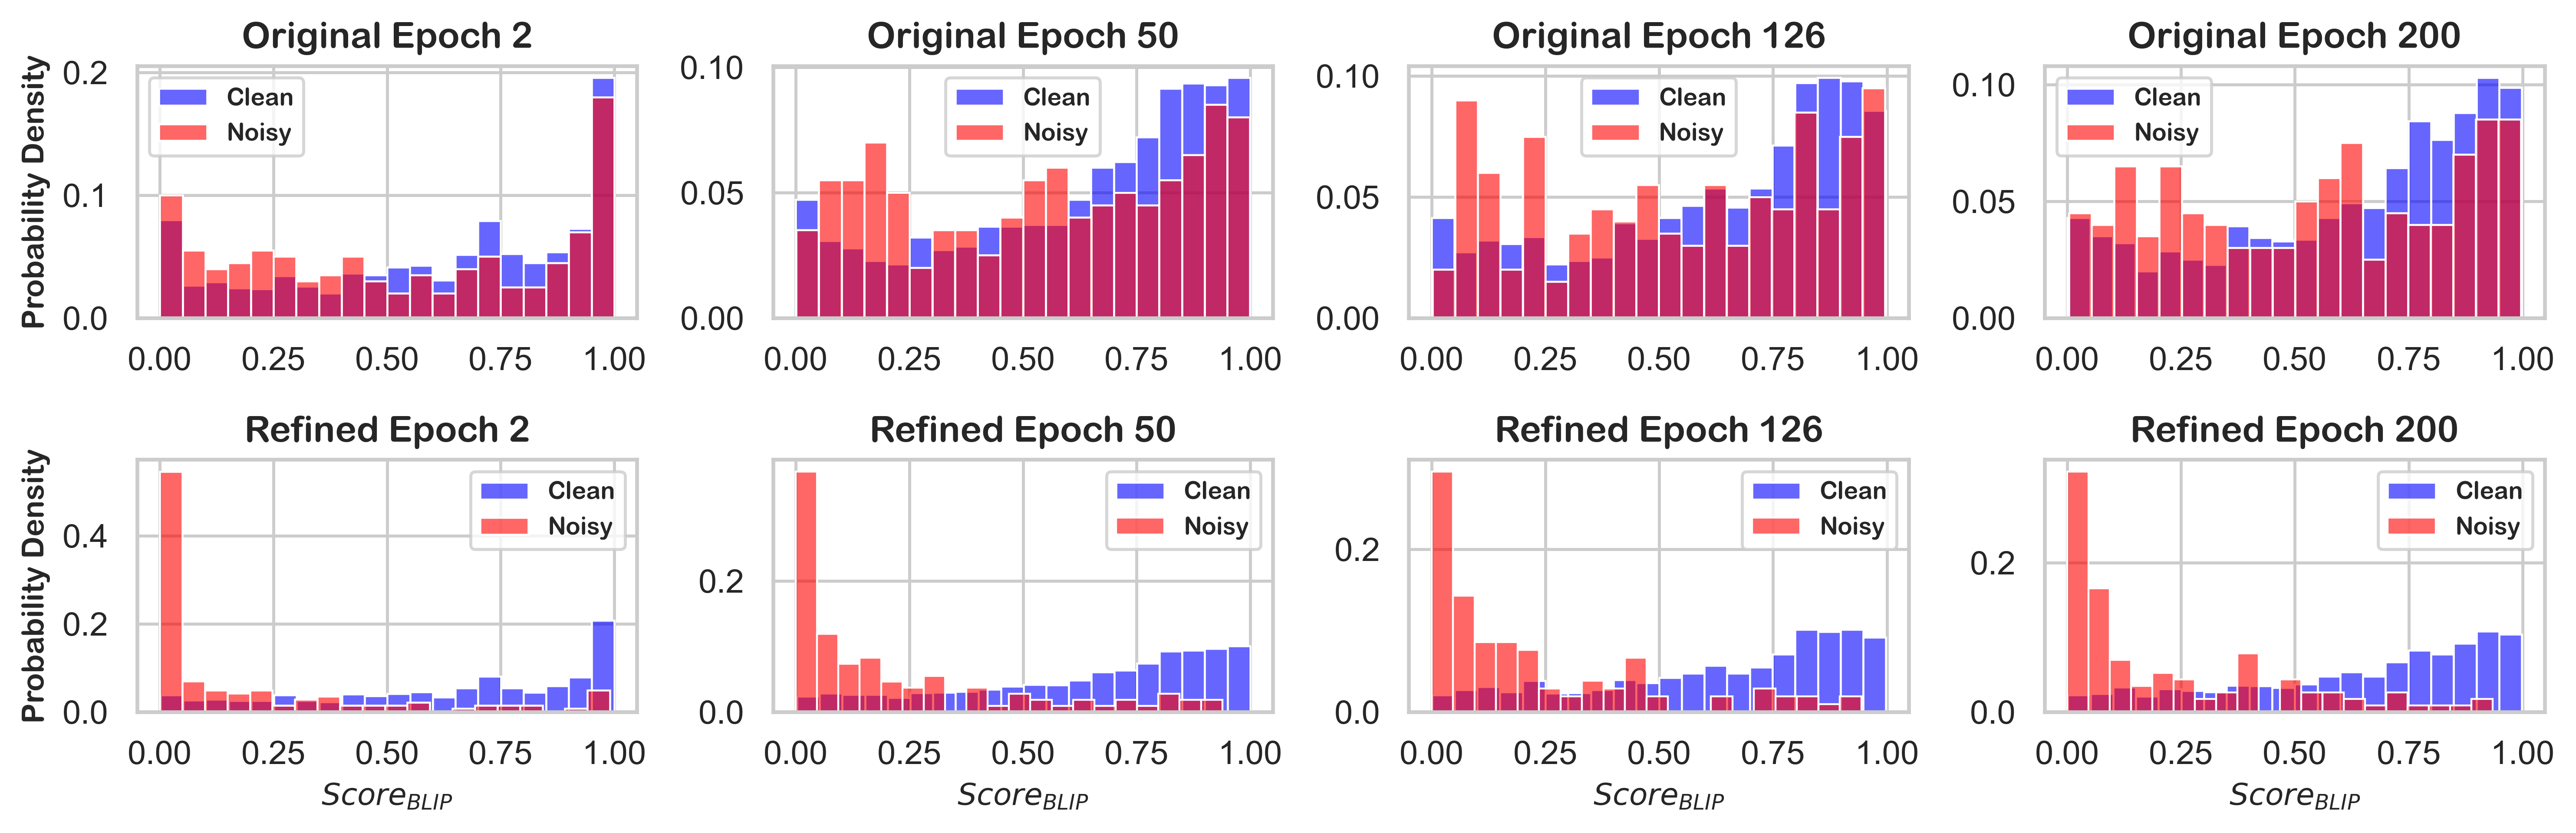

In [6]:
# get the two sub datasets: clean and noisy
noisy_id, clean_id = RPL.data['noisy id'] == True, RPL.data['noisy id'] == False

epoches = ['epoch 2', 'epoch 50', 'epoch 126', 'epoch 200']

output_dir = '../output/RobustPromptLearning/BLIPScore'
data_clean, data_noisy = [[], []], [[], []]
for row in range(2):        
    for ep in epoches:
        col_name = ep + " noisy id"
        pred_noisy_id, pred_clean_id = RPL.data[col_name] == True, RPL.data[col_name] == False
        if row == 0:
            nid, cid = noisy_id, clean_id
        else:
            nid, cid = pred_noisy_id, pred_clean_id
        data_noisy[row].append(RPL.data.loc[nid, ep])
        data_clean[row].append(RPL.data.loc[cid, ep])

data_names = [["Original Epoch 2", "Original Epoch 50", "Original Epoch 126", "Original Epoch 200"],
              ["Refined Epoch 2", "Refined Epoch 50", "Refined Epoch 126", "Refined Epoch 200"]]
RPL.HistComparePlot("OriginalVSBLIP", data_names, data_clean, data_noisy, output_dir)

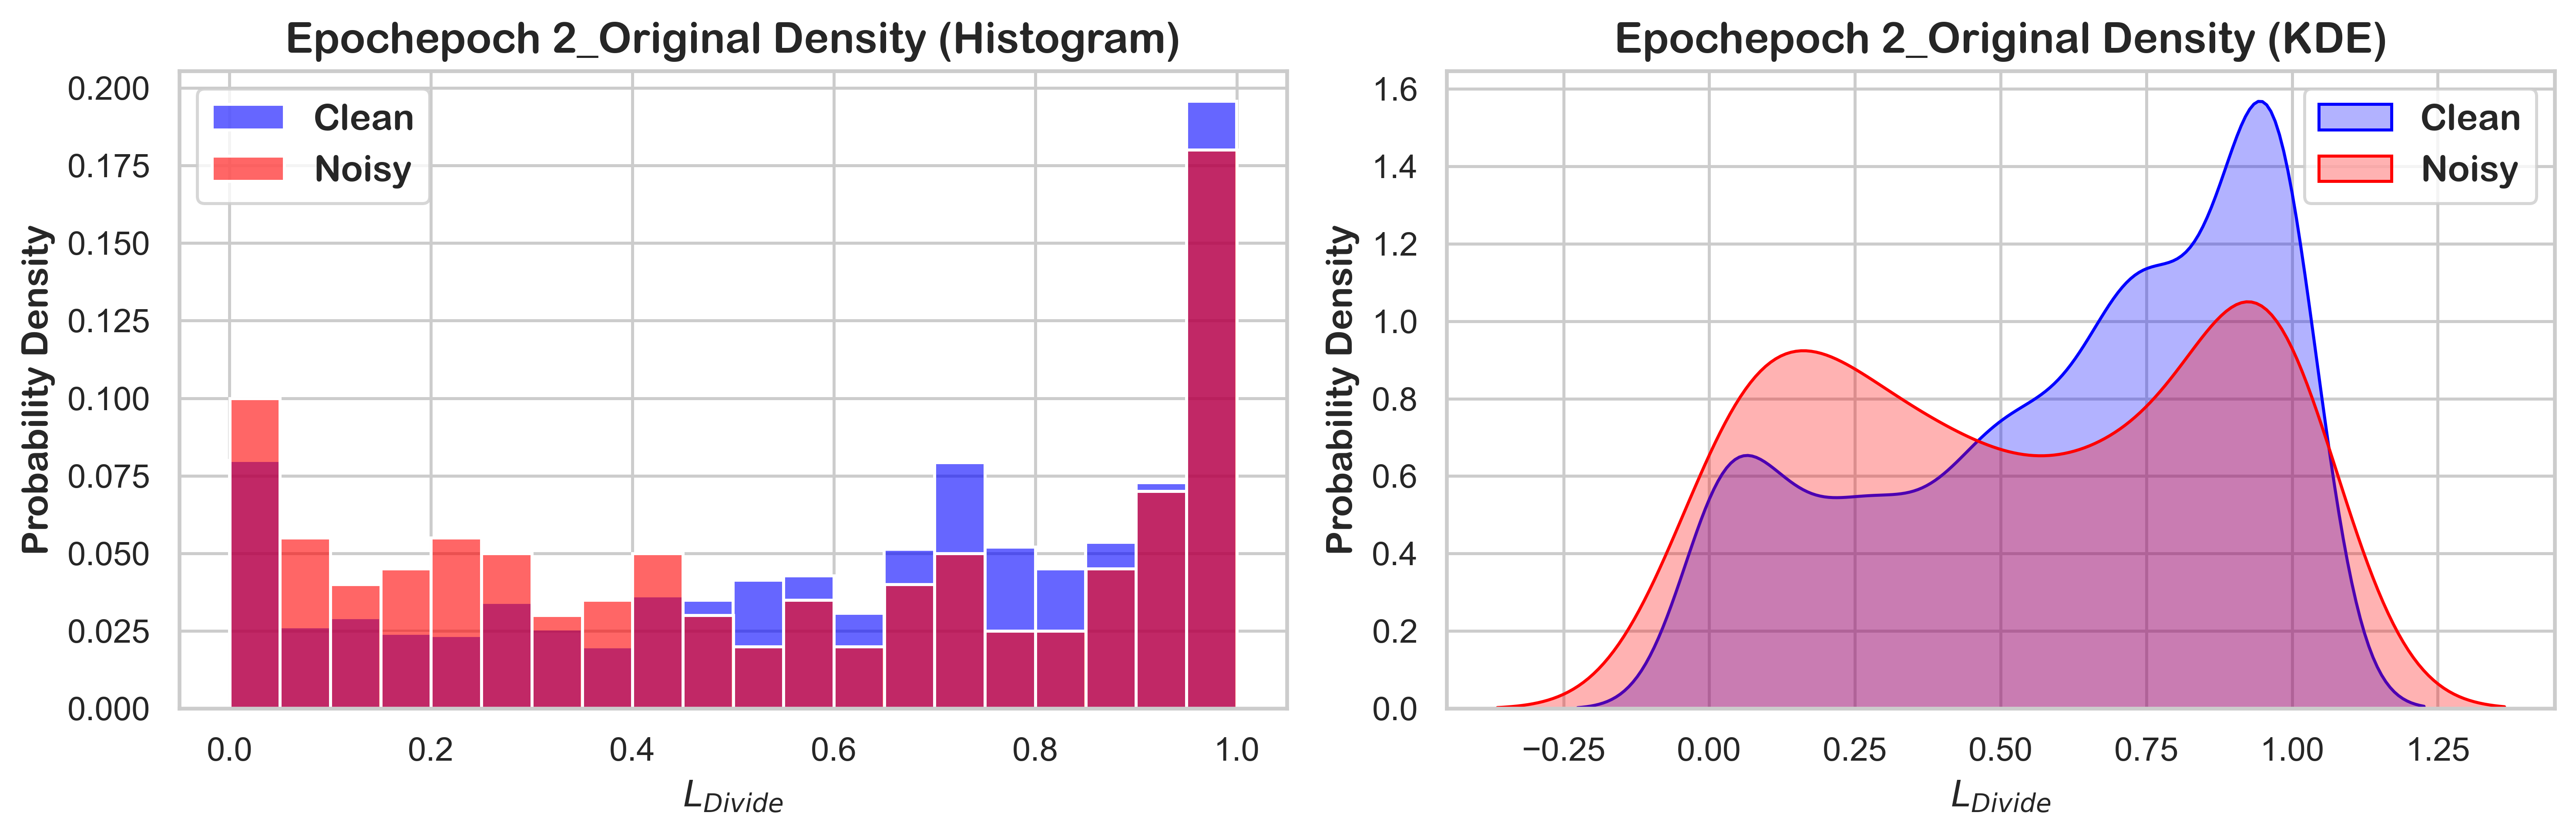

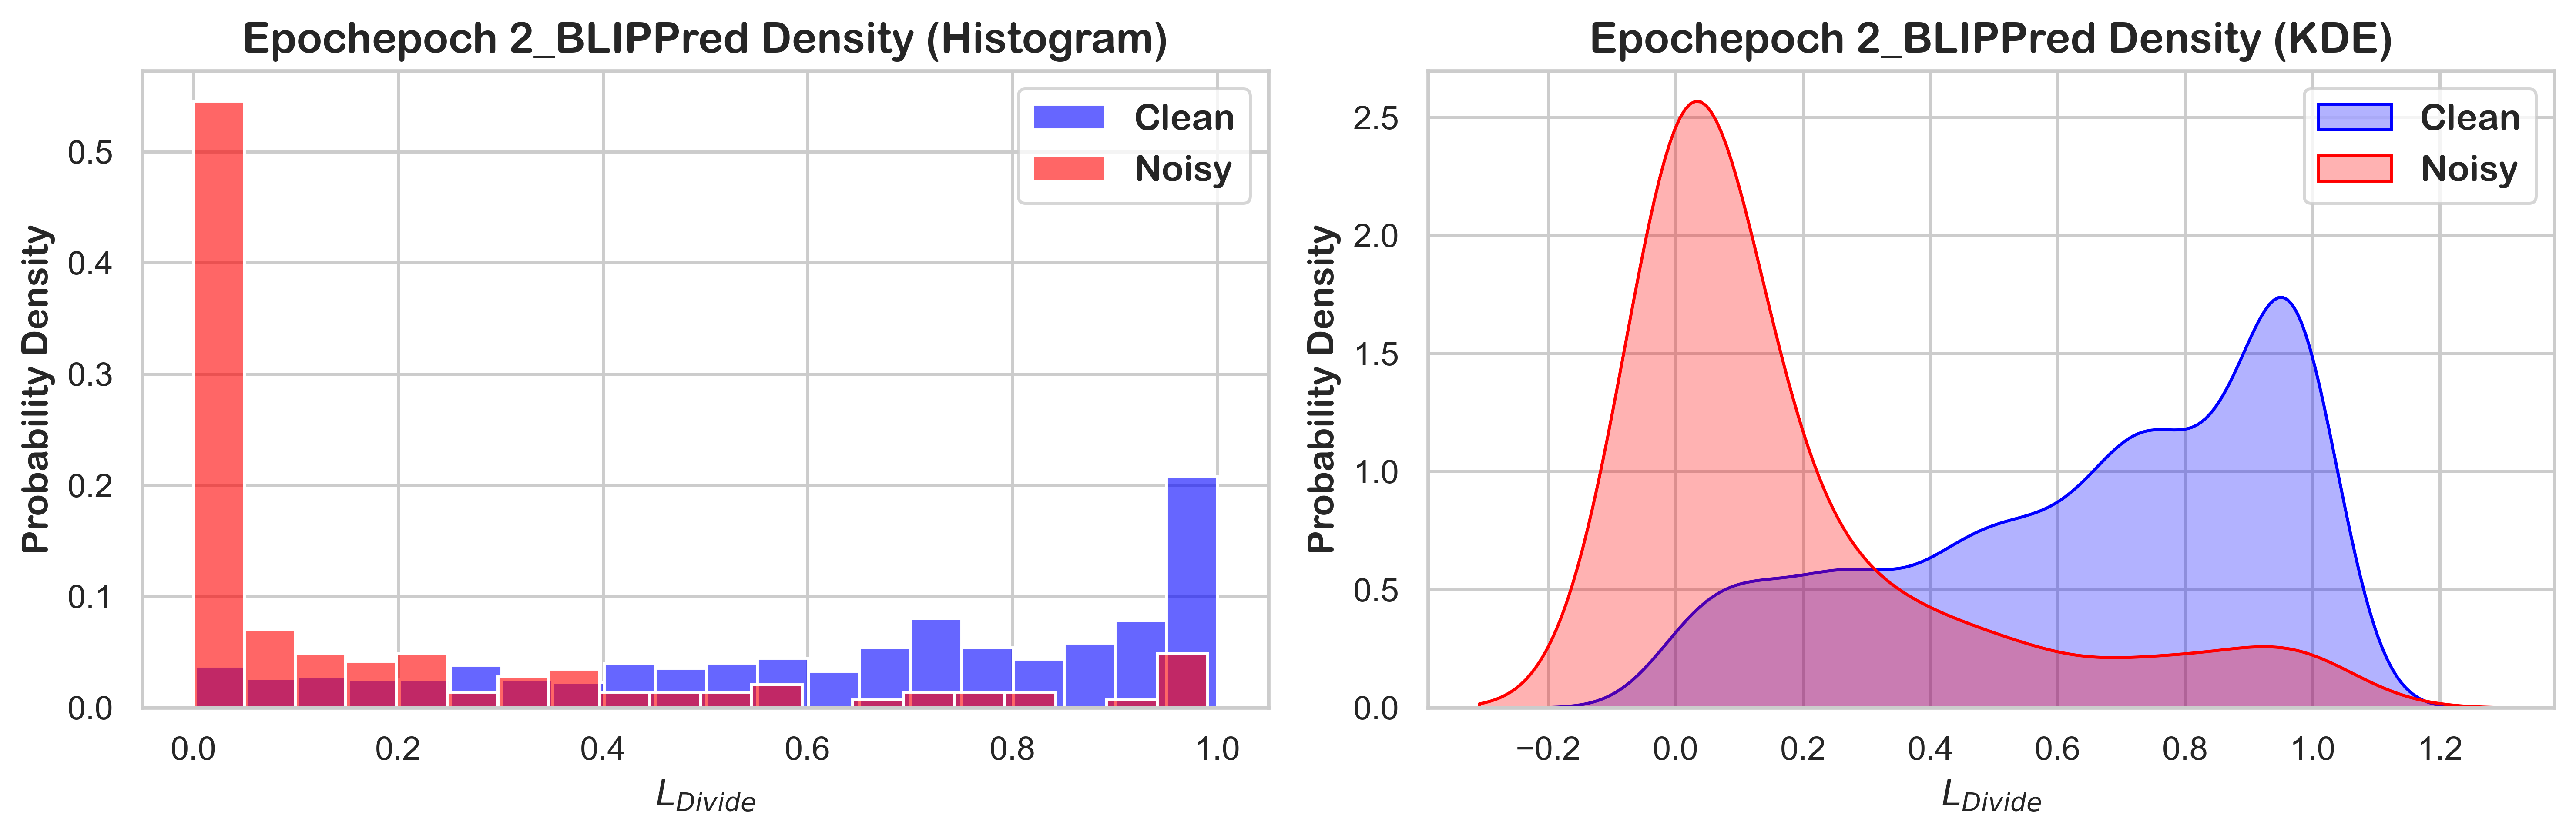

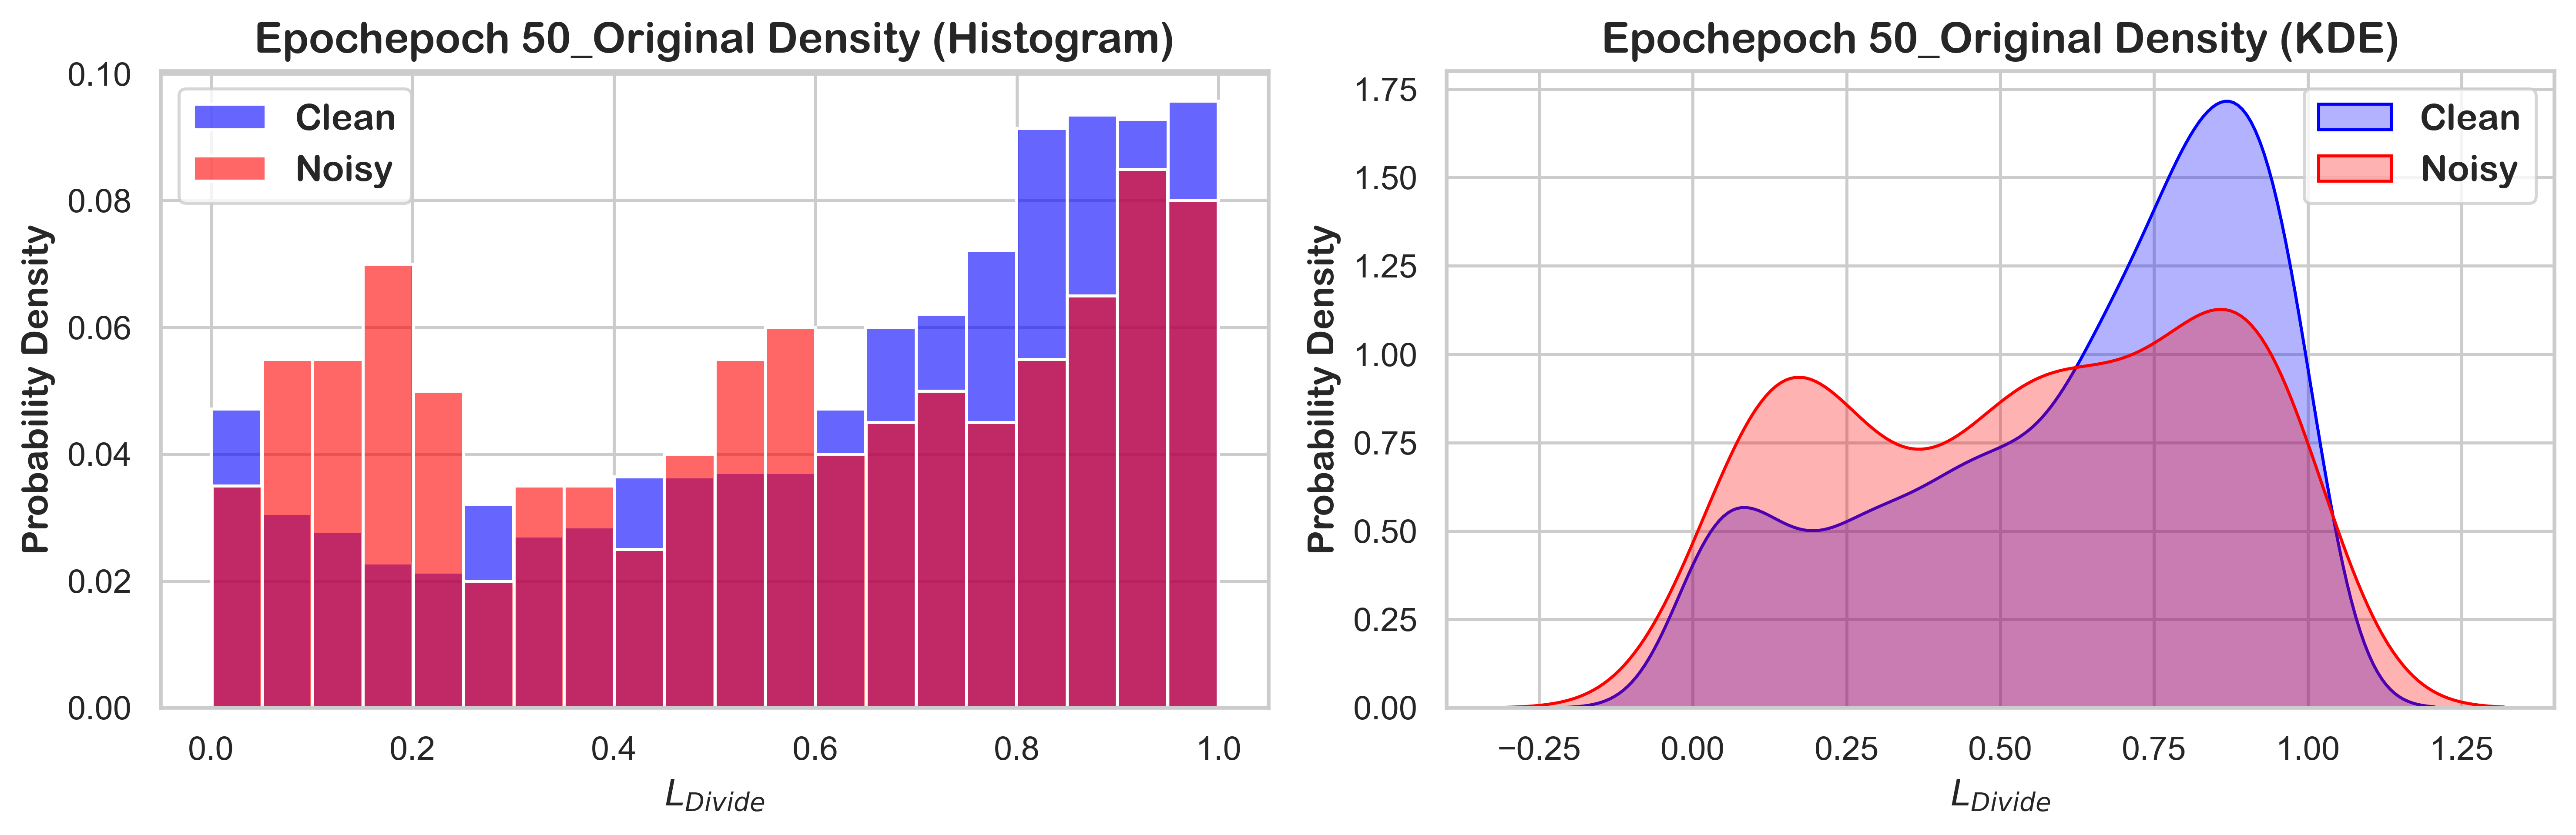

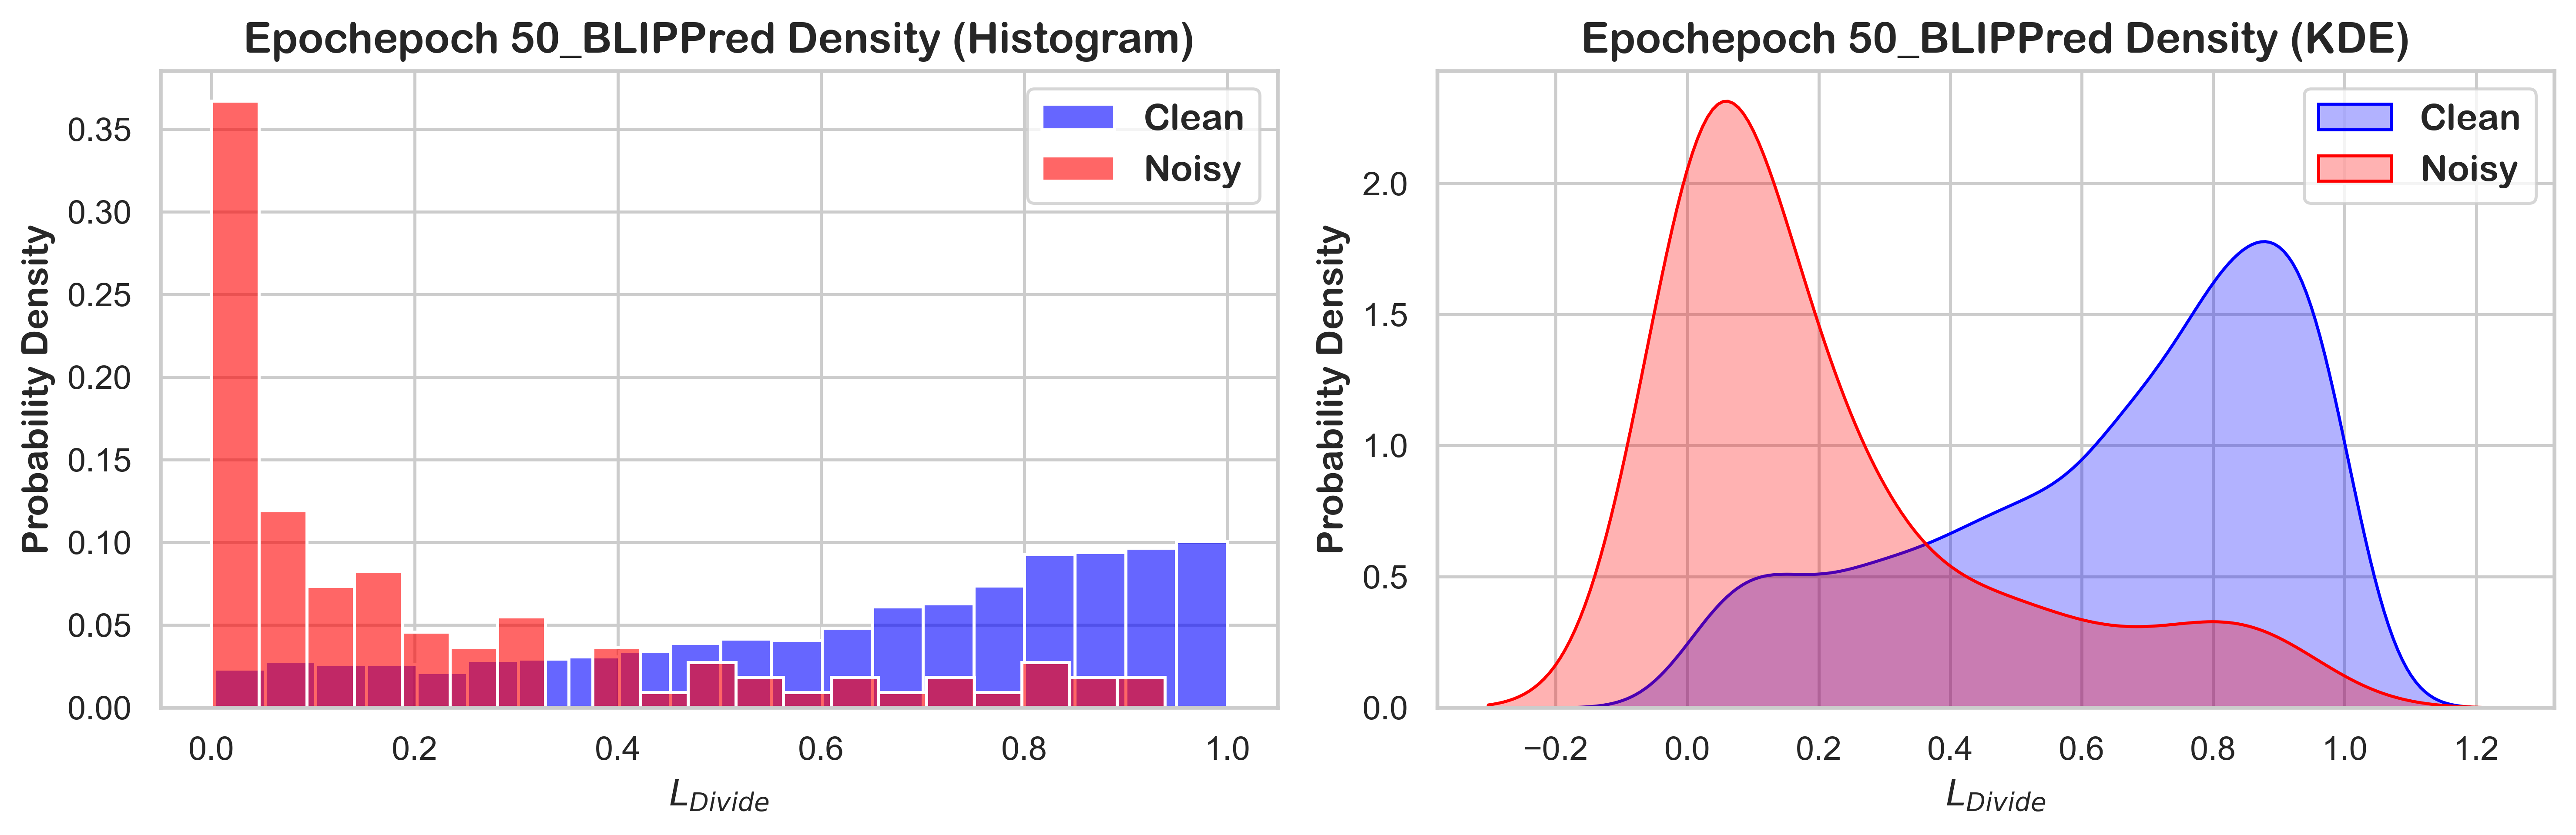

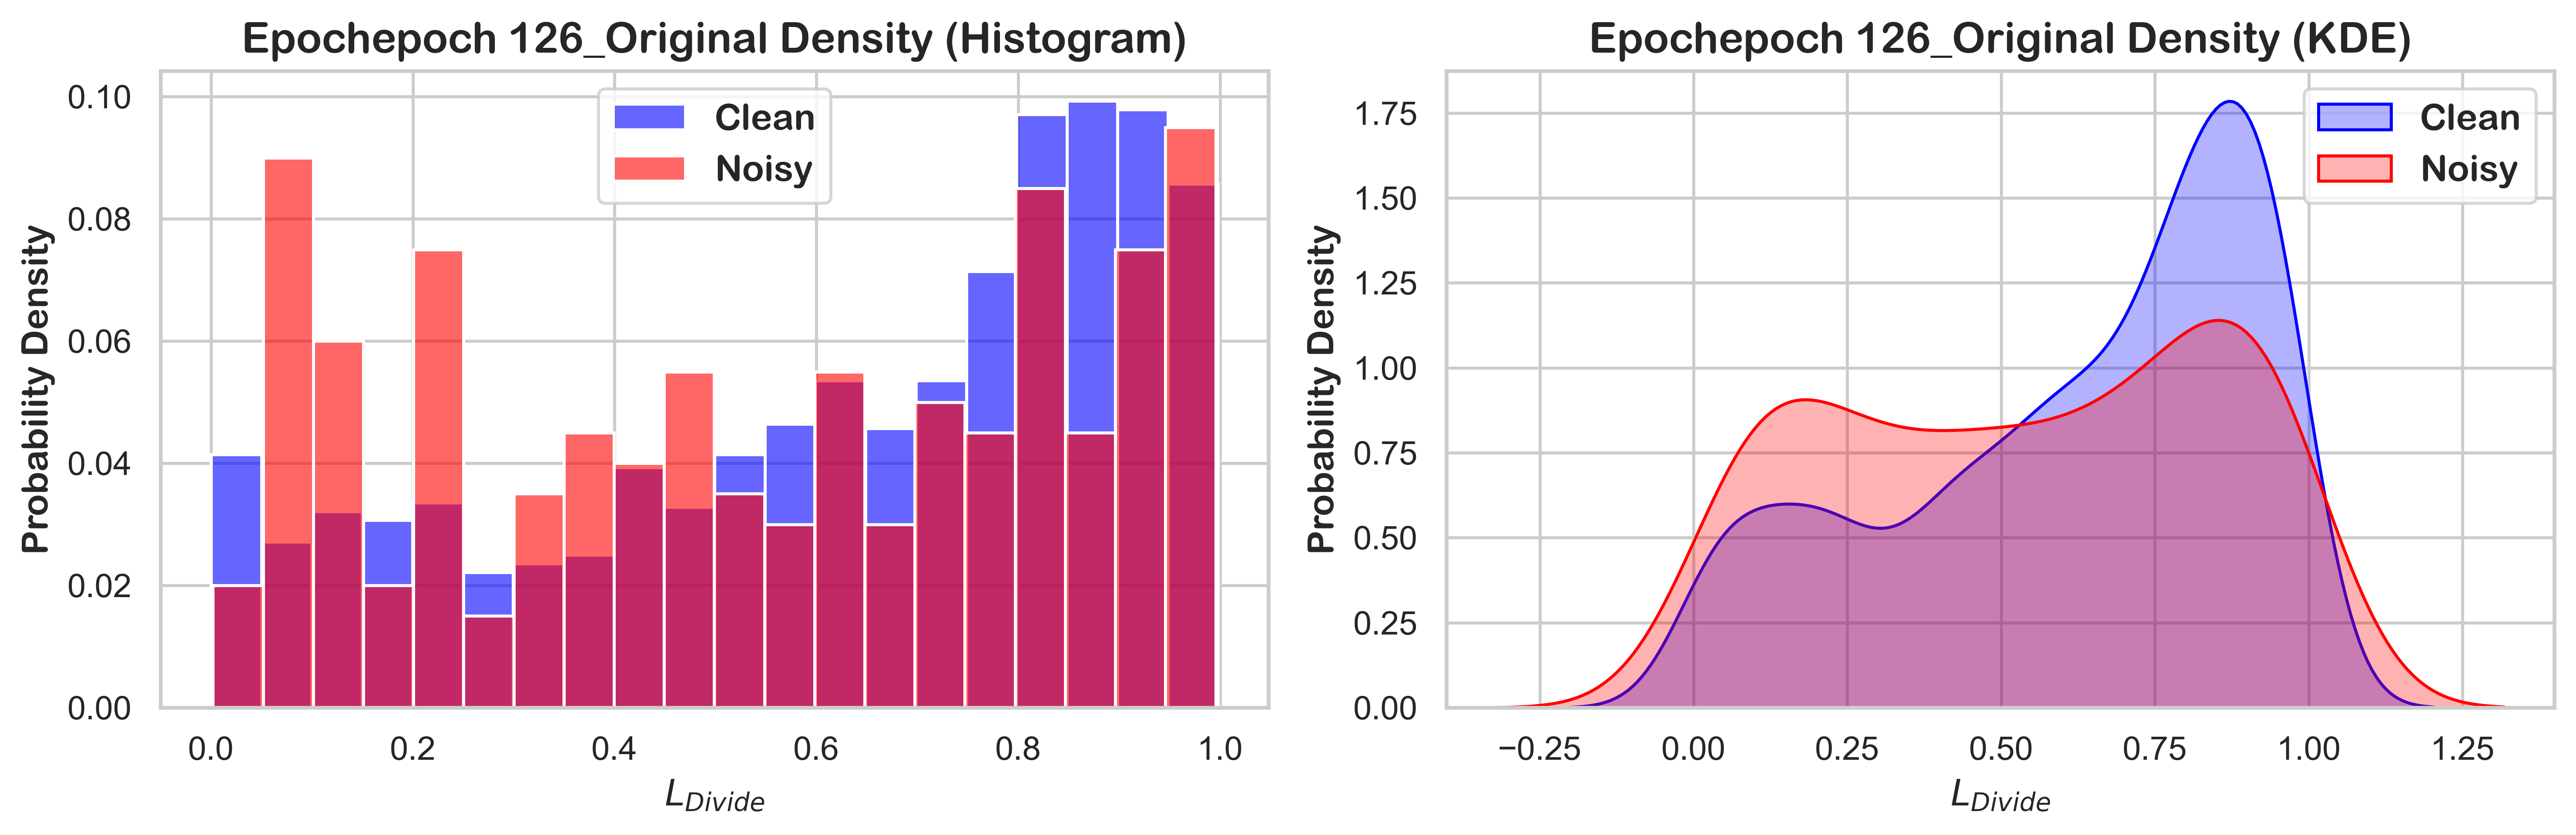

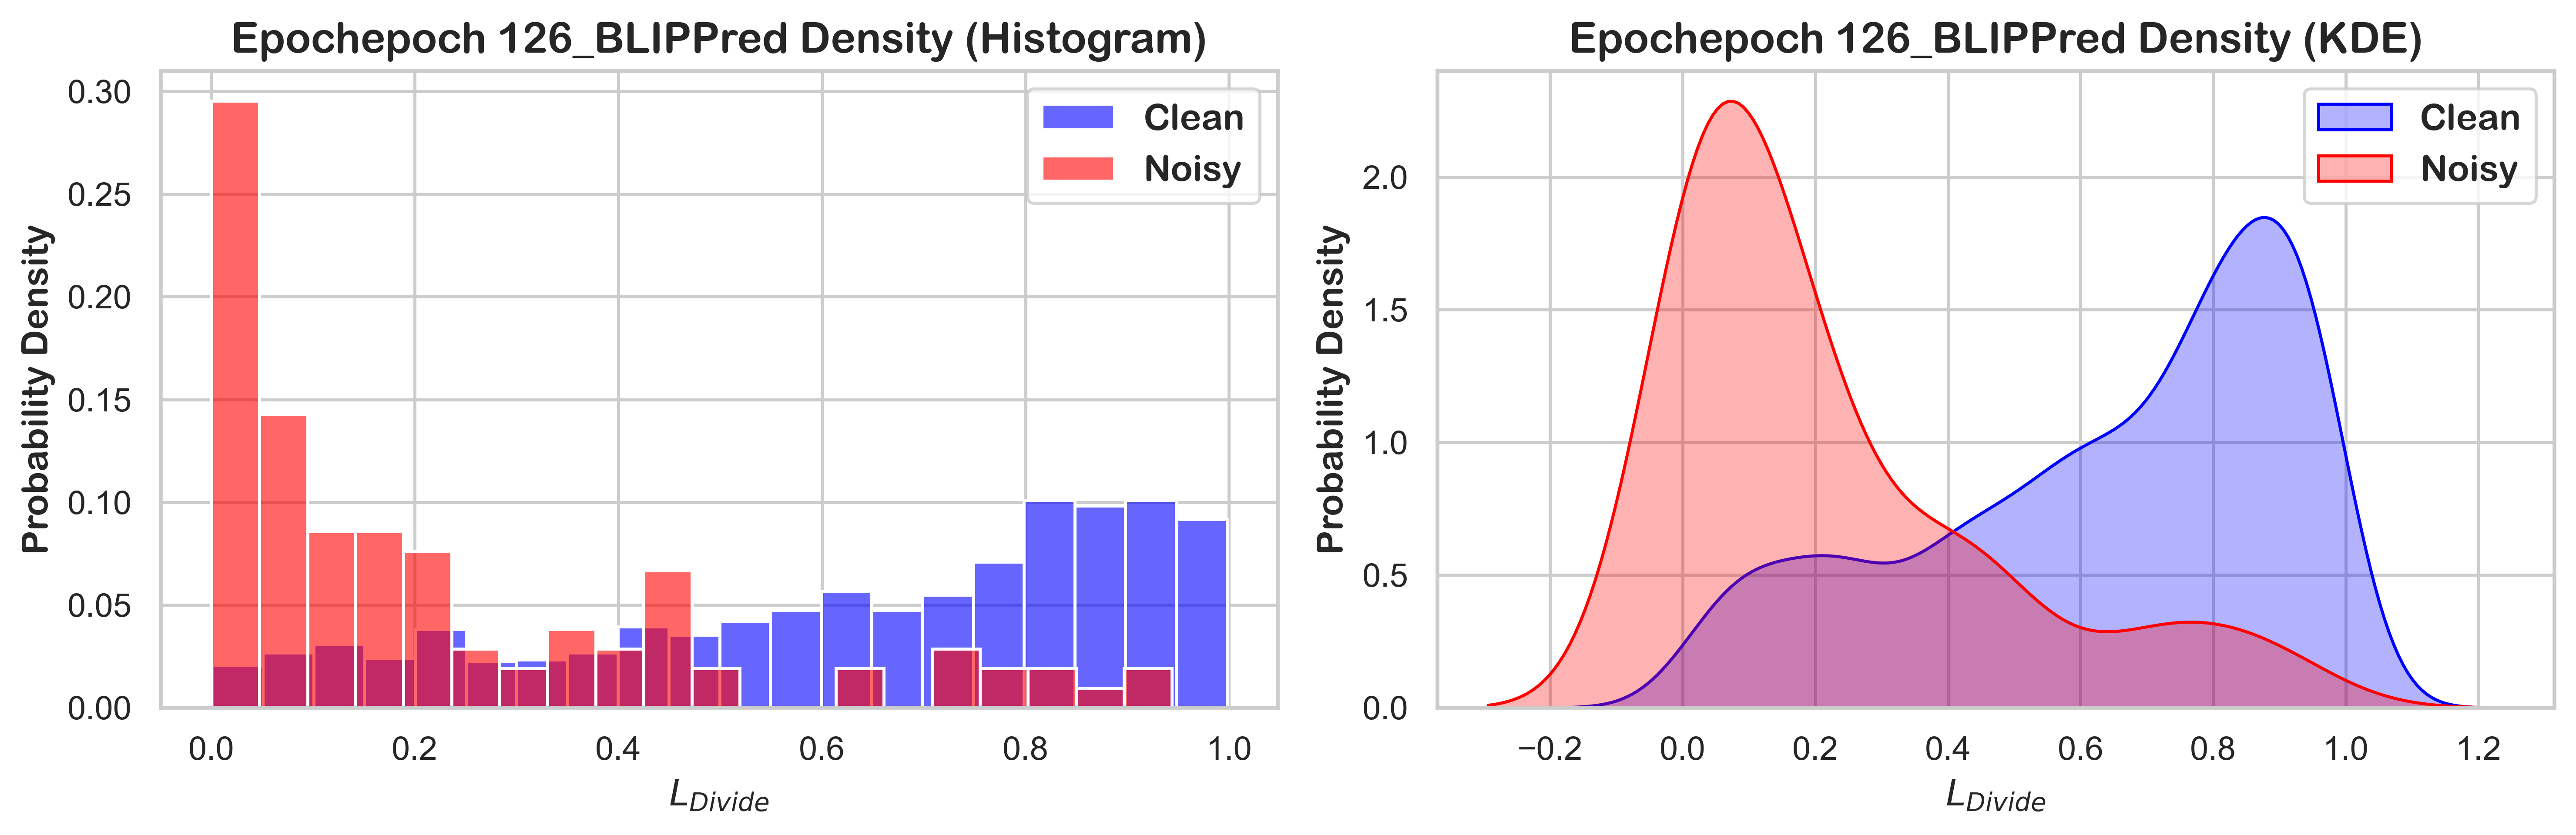

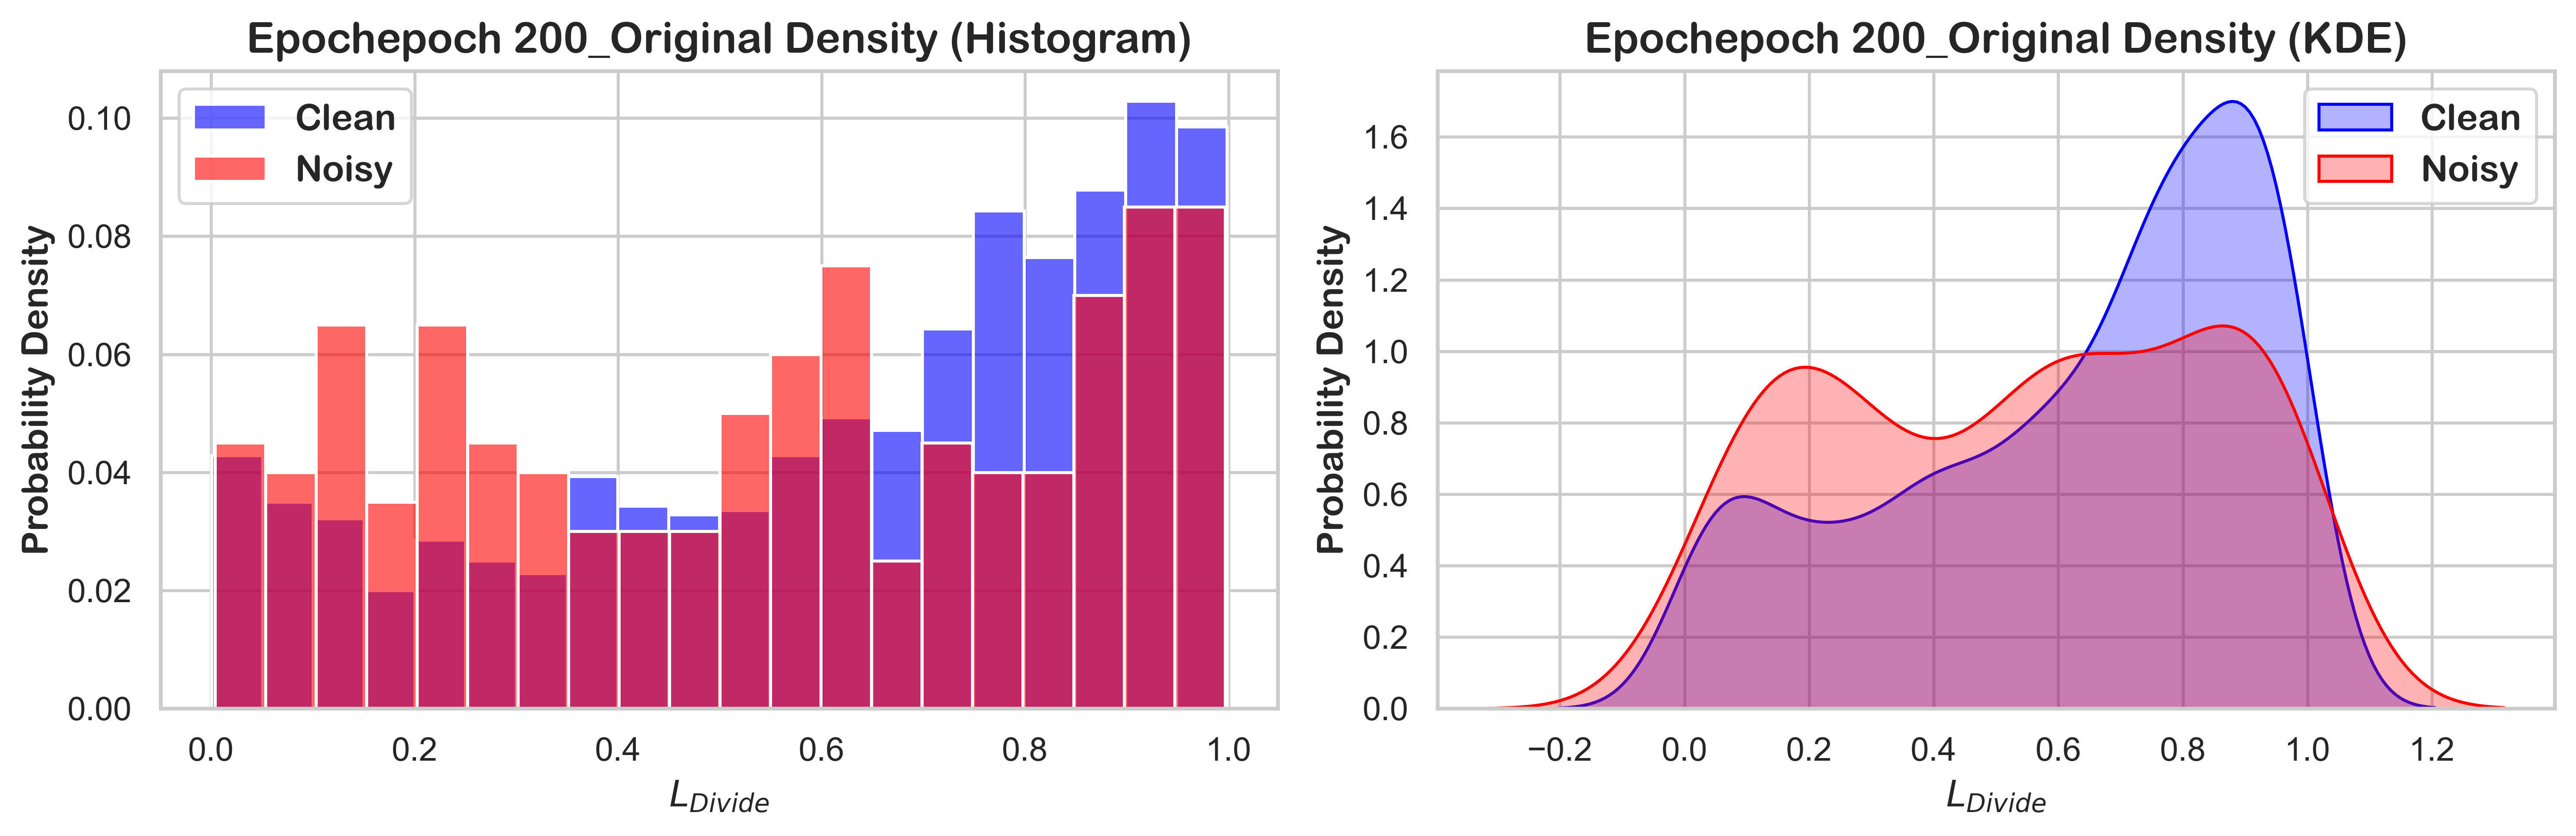

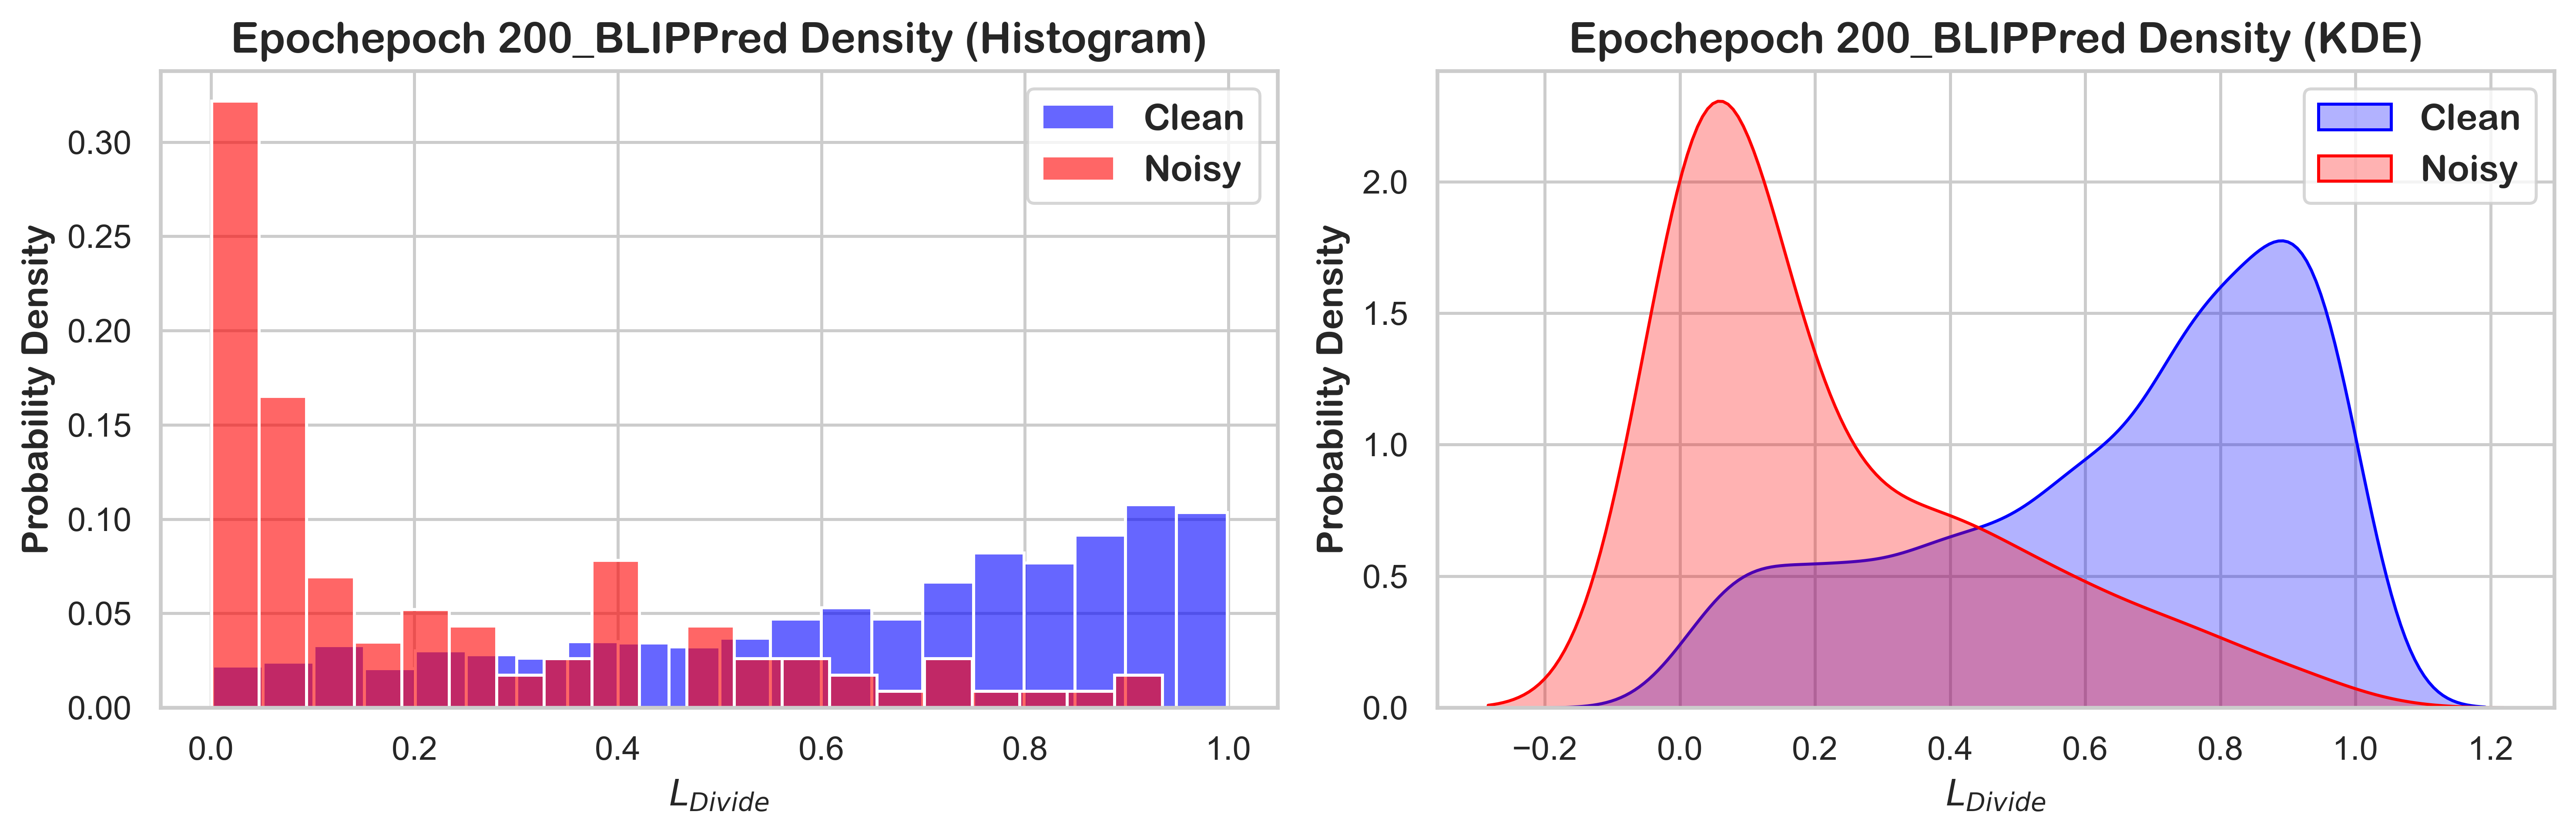

In [7]:
epoches = ['epoch 2', 'epoch 50', 'epoch 126', 'epoch 200']

for ep in epoches:
    col_name = ep + " noisy id"
    pred_noisy_id, pred_clean_id = RPL.data[col_name] == True, RPL.data[col_name] == False
    noisy_sub, clean_sub = RPL.data.loc[noisy_id, ep], RPL.data.loc[clean_id, ep]
    pred_noisy_sub, pred_clean_sub = RPL.data.loc[pred_noisy_id, ep], RPL.data.loc[pred_clean_id, ep]
    
    RPL.HistKdePlot(f"Epoch{ep}_Original", f"Epoch{ep}_Original", clean_sub, noisy_sub, output_dir)
    RPL.HistKdePlot(f"Epoch{ep}_BLIPPred", f"Epoch{ep}_BLIPPred", pred_clean_sub, pred_noisy_sub, output_dir)